In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np



In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Transfer_calls.xlsx to Transfer_calls.xlsx


In [ ]:
df=pd.read_excel('Transfer_calls.xlsx')


In [ ]:
df.tail()

,StartDate,Transferred_call
664,2023-10-27,855
665,2023-10-28,123
666,2023-10-29,14
667,2023-10-30,824
668,2023-10-31,527


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 669 entries, 2022-01-01 to 2023-10-31
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Transferred_call  669 non-null    int64
dtypes: int64(1)
memory usage: 10.5 KB


<Axes: xlabel='StartDate'>

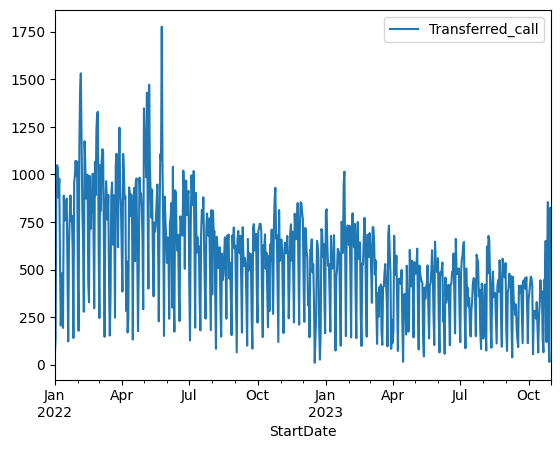

In [ ]:
df.plot()

In [ ]:
df= np.log(df)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<Axes: xlabel='StartDate'>

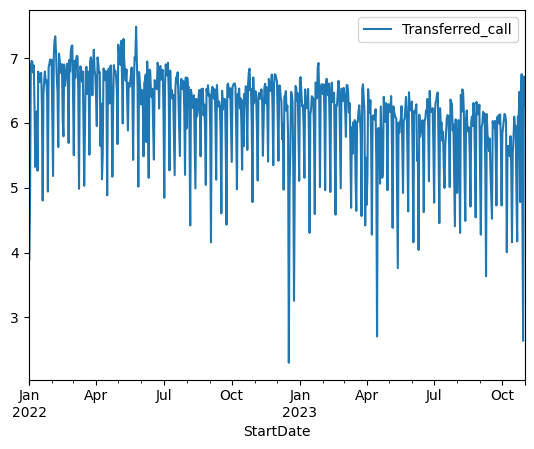

In [ ]:
df.plot()

In [ ]:
train= df.iloc[:-134]
test= df.iloc[-134:]

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.arima.model import ARIMA

<Axes: xlabel='StartDate'>

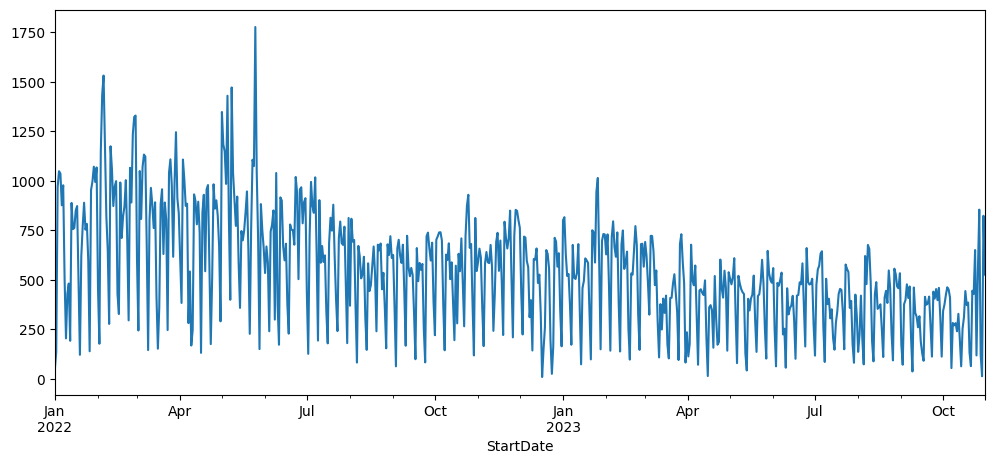

In [ ]:
df['Transferred_call'].plot(figsize=(12,5))

Check For Stationarity


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def ad_test(dataset):
  dftest =adfuller(dataset,autolag='AIC')
  print("1. ADF:", dftest[0])
  print("2. P-Value :", dftest[1])
  print("Critical Values")
  for key, val in dftest[4].items():
    print("\t",key," : ",val)

In [ ]:
ad_test(df['Transferred_call'])

1. ADF: -1.4994383247019767
2. P-Value : 0.5337891733287455
Critical Values
	 1%  :  -3.4404817800778034
	 5%  :  -2.866010569916275
	 10%  :  -2.569150763698369


In [ ]:

from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stepwise_fit= auto_arima(df['Transferred_call'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9450.693, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9416.842, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9232.618, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9448.698, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9231.966, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9181.904, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9414.850, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=9153.129, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=9330.289, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=9154.951, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=9155.873, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  669
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -4437.074
Date:                Wed, 15 Nov 2023   AIC                           8896.147
Time:                        09:17:58   BIC                           8945.694
Sample:                    01-01-2022   HQIC                          8915.341
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9364      0.085     11.065      0.000       0.771       1.102
ar.L2         -1.5395      0.070    -22.059      0.000      -1.676      -1.403
ar.L3          1.0257      0.112      9.164      0.000       0.806       1.245
ar.L4         -1.0869      0.073    -14.833      0.000      -1.230      -0.943
ar.L5          0.1632      0.075      2.167      0.030       0.016       0.311
ma.L1         -1.6030      0.058    -27.757      0.000      -1.716      -1.490
ma.L2          1.9534      0.082     23.912      0.000       1.793       2.113
ma.L3         -1.9606      0.074    -26.483      0.000      -2.106      -1.816
ma.L4          1.4645      0.081     18.015      0.000       1.305       1.624
ma.L5         -0.7612      0.053    -14.341      0.000      -0.865      -0.657
sigma2      4.606e+04   2618.394     17.592      0.000    4.09e+04    5.12e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):               231.72
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(df.shape)
train= df.iloc[:-134]
test= df.iloc[-134:]
print(train.shape,test.shape)

(669, 1)
(535, 1) (134, 1)


In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.arima.ARIMA(train['Transferred_call'],order=(5,1,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Transferred_call   No. Observations:                  535
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -3606.529
Date:                Wed, 15 Nov 2023   AIC                           7235.058
Time:                        09:21:19   BIC                           7282.143
Sample:                    01-01-2022   HQIC                          7253.482
                         - 06-19-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2128      0.105     -2.034      0.042      -0.418      -0.008
ar.L2         -0.5376      0.074     -7.242      0.000      -0.683      -0.392
ar.L3         -0.4576      0.130     -3.510      0.000      -0.713      -0.202
ar.L4         -0.0417      0.070     -0.596      0.551      -0.179       0.096
ar.L5         -0.7077      0.082     -8.604      0.000      -0.869      -0.546
ma.L1         -0.3162      0.104     -3.032      0.002      -0.521      -0.112
ma.L2          0.0891      0.104      0.853      0.394      -0.116       0.294
ma.L3          0.1836      0.109      1.688      0.091      -0.030       0.397
ma.L4         -0.5207      0.082     -6.333      0.000      -0.682      -0.360
ma.L5          0.5253      0.061      8.558      0.000       0.405       0.646
sigma2      4.378e+04   2643.464     16.563      0.000    3.86e+04     4.9e+04
===================================================================================
Ljung-Box (L1) (Q):                   8.16   Jarque-Bera (JB):                 5.21
Prob(Q):                              0.00   Prob(JB):                         0.07
Heteroskedasticity (H):               0.29   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end= len(train)+ len(test)-1
pred= model.predict(start=start,end=end, typ='levels')
print(pred)
pred.index=df.index[start:end+1]
print(pred)

2023-06-20    330.420080
2023-06-21    395.795777
2023-06-22    424.448809
2023-06-23    262.631588
2023-06-24    266.984302
                 ...    
2023-10-27    353.800141
2023-10-28    353.256335
2023-10-29    353.759592
2023-10-30    354.089705
2023-10-31    353.453083
Freq: D, Name: predicted_mean, Length: 134, dtype: float64
StartDate
2023-06-20    330.420080
2023-06-21    395.795777
2023-06-22    424.448809
2023-06-23    262.631588
2023-06-24    266.984302
                 ...    
2023-10-27    353.800141
2023-10-28    353.256335
2023-10-29    353.759592
2023-10-30    354.089705
2023-10-31    353.453083
Name: predicted_mean, Length: 134, dtype: float64


<Axes: xlabel='StartDate'>

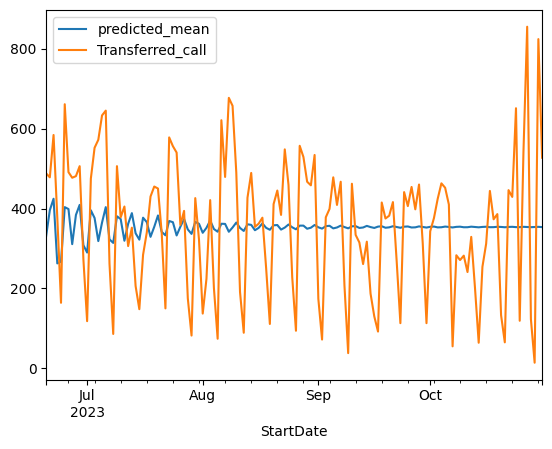

In [ ]:
pred.plot(legend=True)
test['Transferred_call'].plot(legend=True)

In [ ]:
test['Transferred_call'].mean()

359.82835820895525

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse= sqrt(mean_squared_error(pred,test['Transferred_call']))
print(rmse)

165.1011195134723


In [ ]:
model=sm.tsa.arima.ARIMA(train['Transferred_call'],order=(5,1,5))
model=model.fit()
forecast = model_fit.forecast(steps=number_of_forecast_steps)


In [ ]:
index_future_dates=pd.date_range(start='2023-11-01',end='2023-12-01')
#print(index_future_dates)
pred=model.predict(start=len(df),end=len(df)+30, typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)


2023-11-01    353.447117
2023-11-02    354.003440
2023-11-03    353.809650
2023-11-04    353.347472
2023-11-05    353.746221
2023-11-06    353.979530
2023-11-07    353.541375
2023-11-08    353.483147
2023-11-09    353.934780
2023-11-10    353.778547
2023-11-11    353.448802
2023-11-12    353.708811
2023-11-13    353.924612
2023-11-14    353.576695
2023-11-15    353.540057
2023-11-16    353.858662
2023-11-17    353.776753
2023-11-18    353.501457
2023-11-19    353.706031
2023-11-20    353.860618
2023-11-21    353.621656
2023-11-22    353.565239
2023-11-23    353.821267
2023-11-24    353.755237
2023-11-25    353.558029
2023-11-26    353.689803
2023-11-27    353.827242
2023-11-28    353.638958
2023-11-29    353.599793
2023-11-30    353.780526
2023-12-01    353.750289
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

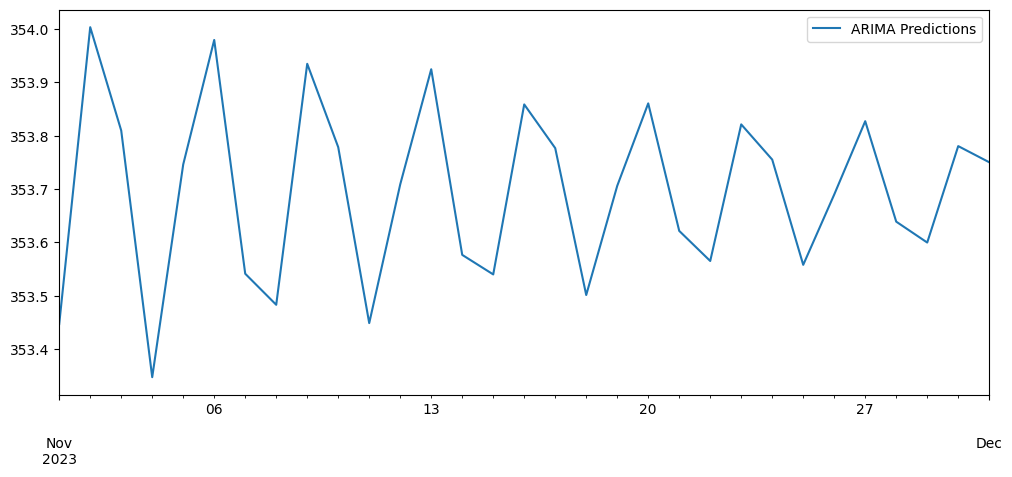

In [ ]:
pred.plot(figsize=(12,5),legend=True)

In [ ]:
import matplotlib.pyplot as plt

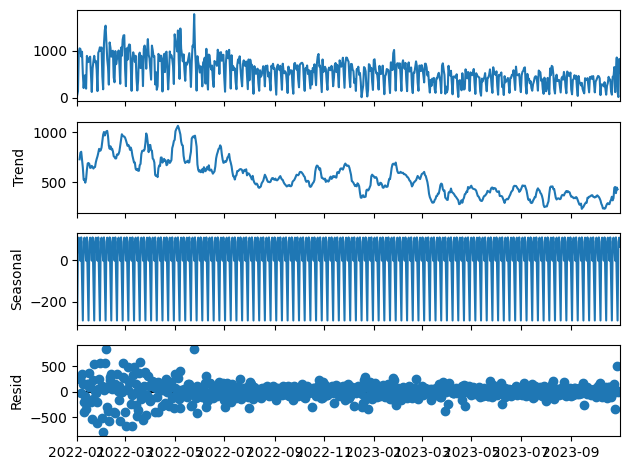

In [ ]:
decomposition= sm.tsa.seasonal_decompose(df,model='additive')
fig= decomposition.plot()
plt.show()

In [ ]:
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error


In [ ]:
from pandas import DataFrame
from matplotlib import pyplot

In [ ]:
model = sm.tsa.arima.ARIMA(train, order=(5,1,5))
result = model.fit()

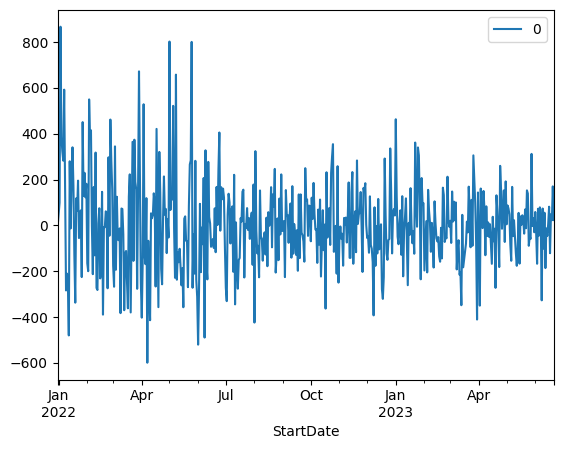

In [ ]:
# line plot of residuals
residuals = DataFrame(result.resid)
residuals.plot()
pyplot.show()

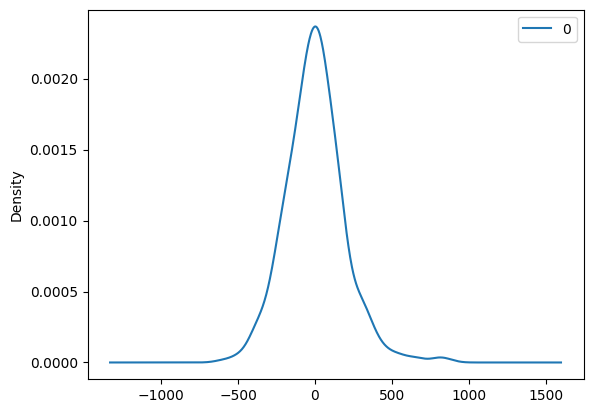

In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
# summary stats of residuals
print(residuals.describe())

                0
count  538.000000
mean     0.932368
std    193.202566
min   -599.351027
25%   -121.143737
50%     -1.878376
75%    107.739578
max    866.775372


In [ ]:
model = ARIMA(df, order=(5, 1, 5))
model_fit = model.fit(disp=0)

forecast = model_fit.forecast(steps=len('Transferred_call'))

In [ ]:
mae = mean_absolute_error(df, 'Transferred_call')
